# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [3]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [4]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [5]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df_city_country = df[["city", "country"]]
df_city_country

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [6]:
# Q2: how to get the first 5 rows of the "city" column?
city_5_rows = df.iloc[0:5, 3]
city_5_rows

# city_5_rows2 = df.iloc[[0, 1, 2, 3, 4], [3]]
# city_5_rows2

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [7]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [8]:
# Q4: how to use .loc to select the first row in "country" column?
df.loc[[0],["country"]]

,country
0,United Kingdom


In [9]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df.loc[0:3, ["city", "date"]]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


### Using .iloc[ ]

In [10]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[3, 2]

'05/14/2014 11:24'

In [11]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[::300, :]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [12]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [13]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df["city"] == "Munich"

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [14]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it.
spanish_visited_cities_excl_bcn = df[(df["country"] == "Spain") &
                                     (df["city"] != "Barcelona")]
spanish_visited_cities_excl_bcn

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [18]:
# Q11: select rows where either the city is munich, or the country is serbia
munich_or_serbia = df[(df["city"] == "Munich") |
                      (df["country"] == "Serbia")]
munich_or_serbia

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [20]:
# Q12: how many observations are west of the prime meridian?
# West of the meridian means longitude < 0
len(df[df["lon"] < 0])

24

In [22]:
# Q13: get all rows that contain a city that starts with the letter G
row_G = df[df["city"].str.startswith("G")]
row_G

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [24]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
unique_cities = len(df.city.unique())
unique_countries = len(df.country.unique())
missing = df.isnull()

print(unique_cities)
print(unique_countries)
print(missing)
missing.sum()

91
15
       lat    lon   date   city  country
0    False  False  False  False    False
1    False  False  False  False    False
2    False  False  False  False    False
3    False  False  False  False    False
4    False  False  False  False    False
..     ...    ...    ...    ...      ...
173  False  False  False  False    False
174  False  False  False  False    False
175  False  False  False  False    False
176  False  False  False  False    False
177  False  False  False  False    False

[178 rows x 5 columns]


lat        0
lon        0
date       0
city       0
country    0
dtype: int64

In [36]:
# Q15: group by country name and show the city names in each of the country
df.groupby("country")['city'].unique()

country
Albania                                                [Berat, Gjirokastër]
Bosnia and Herzegovina                                   [Sarajevo, Mostar]
Croatia                                           [Ploče, Split, Dubrovnik]
Czech Republic            [Novy Bohumin, Hranice, Prerov, Ústí nad Orlic...
Germany                   [Kümmersbruck, Winkelhaid, Kammerstein, Ellhof...
Greece                    [Kakavia, Dytiki Ellada, Peloponnese, Athens, ...
Kosovo                                                            [Prizren]
Macedonia (FYROM)                                                   [Ohrid]
Montenegro                                                          [Kotor]
Poland                    [Zendek, Silesian Voivodeship, Dabrowa Gornicz...
Portugal                  [Lisbon, Algueirão-Mem Martins, Sintra, Azambu...
Serbia                                                [Belgrade, Slepčević]
Spain                     [El Prat de Llobregat, Viladecans, Barcelona, ...
Turk

## Part 3 <br /> How to select based on a date-time values

In [44]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [42]:
# Q16: is the timestamp index unique? How can you use code to find it?
dt_unique = dt.index.is_unique
dt_unique

False

In [46]:
# Q17: drop duplicate index
index_drop = dt.index.drop_duplicates()
print(index_drop)

DatetimeIndex(['2014-05-14 09:07:00', '2014-05-14 09:22:00',
               '2014-05-14 10:51:00', '2014-05-14 11:24:00',
               '2014-05-14 11:38:00', '2014-05-14 12:23:00',
               '2014-05-14 12:38:00', '2014-05-14 15:11:00',
               '2014-05-14 15:25:00', '2014-05-14 15:41:00',
               ...
               '2014-07-09 06:03:00', '2014-07-09 06:18:00',
               '2014-07-09 09:03:00', '2014-07-09 09:18:00',
               '2014-07-09 13:11:00', '2014-07-09 13:13:00',
               '2014-07-09 13:14:00', '2014-07-09 13:17:00',
               '2014-07-09 13:18:00', '2014-07-09 13:20:00'],
              dtype='datetime64[ns]', name='date', length=1758, freq=None)


In [56]:
# Q18: create a weekday and a weekend dataframe
is_weekday = dt.index.weekday < 5  # Weekday if weekday number is less than 5 (Saturday)

# Create separate DataFrames for weekdays and weekends
df_weekday = dt[is_weekday]
df_weekend = dt[~is_weekday]

# Print weekday and weekend DataFrames
print("Weekday DataFrame:")
print(df_weekday)
print("\nWeekend DataFrame:")
print(df_weekend)

Weekday DataFrame:
                           lat        lon          city         country
date                                                                   
2014-05-14 09:07:00  51.481292  -0.451011  West Drayton  United Kingdom
2014-05-14 09:22:00  51.474005  -0.450999      Hounslow  United Kingdom
2014-05-14 10:51:00  51.478199  -0.446081      Hounslow  United Kingdom
2014-05-14 11:24:00  51.478199  -0.446081      Hounslow  United Kingdom
2014-05-14 11:38:00  51.474146  -0.451562      Hounslow  United Kingdom
...                        ...        ...           ...             ...
2014-07-09 13:13:00  48.356013  11.791710        Munich         Germany
2014-07-09 13:14:00  48.356529  11.792183        Munich         Germany
2014-07-09 13:17:00  48.356285  11.791710        Munich         Germany
2014-07-09 13:18:00  48.355328  11.791710        Munich         Germany
2014-07-09 13:20:00  48.357110  11.791346        Munich         Germany

[1245 rows x 4 columns]

Weekend DataFrame:


<Axes: title={'center': 'Number of observations per each day of the week'}, xlabel='date'>

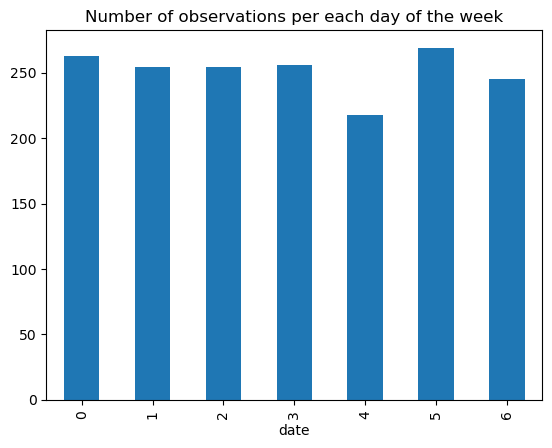

In [57]:
# Q19: calculate and plot the number of observations each day of the week has
daily_obs = dt.groupby(dt.index.weekday).size()
daily_obs.plot(kind="bar", title="Number of observations per each day of the week")